__о представлении float и точности вычислений__

_Евгений Борисов <esborisov@sevsu.ru>_

---

Как работать с числами с плавающей точкой в Python     
https://habr.com/ru/company/skillfactory/blog/658277/  

О точности float в Python   
https://tirinox.ru/float-python/

Built-in Types: Additional Methods on Float   
https://docs.python.org/3/library/stdtypes.html#additional-methods-on-float

---

In [40]:
0.1,  0.2,   0.1 + 0.2

(0.1, 0.2, 0.30000000000000004)

In [30]:
0.1 + 0.2 == 0.3

False

In [41]:
0.8 - 0.1,   0.8 - 0.1 > 0.7

(0.7000000000000001, True)

---

числа с плавающей точкой хранятся в двоичной записи 

64 бита:
* 11 бит на экспоненту 
* 52 бита на мантиссу 
* 1 бит на знак

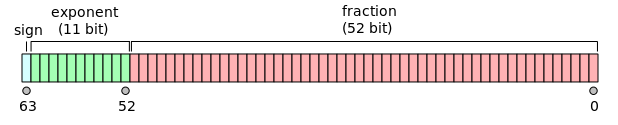

In [54]:
bin(7)

'0b111'

In [57]:
float.hex(-0.1)

'-0x1.999999999999ap-4'

In [64]:
x = -0.1
w, s = (float.hex(x), 0) if x > 0 else (float.hex(x)[1:], 1)
m, e = int(w[4:17], 16), int(w[18:])
    
s, w, ( w[4:17], w[18:] ), (bin(m), e)

(1,
 '0x1.999999999999ap-4',
 ('999999999999a', '-4'),
 ('0b1001100110011001100110011001100110011001100110011010', -4))

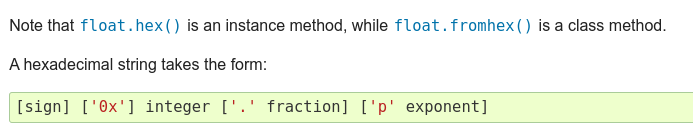

In [56]:
# 64bit IEE754

def float_to_bin(x):
    if x == 0:   return "0" * 64
    w, sign = (float.hex(x), 0) if x > 0 else (float.hex(x)[1:], 1)
    mantissa, exp = int(w[4:17], 16), int(w[18:])
    return "{}{:011b}{:052b}".format(sign, exp + 1023, mantissa)

float_to_bin(-0.001) # '1011111101010000000010110011111101011000011011100110110100101010'


'1011111101010000011000100100110111010010111100011010100111111100'

двоичное число может недостаточно  точно представлять исходное число с основанием 10. 

Двоичным представлением $0.1_{10}$  будет $0.0(0011)_2$, т.е. бесконечно повторяющееся число, записанное с основанием 2.

То же происходит, когда в виде десятичного числа с основанием 10 записывается дробь 1/3,   
получается бесконечно повторяющееся десятичное число 0.3(3).  


не любое реальное число можно представить, используя эти 64 бита.

Простая комбинаторика скажет, что у нас может быть не более 264 разных чисел (64 позиции по 2 варианта), 
а на деле их и того меньше. 

Диапазон чисел, представимых таким форматом составляет: ±1.7*10-308 до 1.7*10+308. 

То есть от очень малых по модулю чисел, до очень больших. 

Допустимые числа на числовой прямой распределены неравномерно: 
гуще в районе нуля и реже в районе огромных чисел.

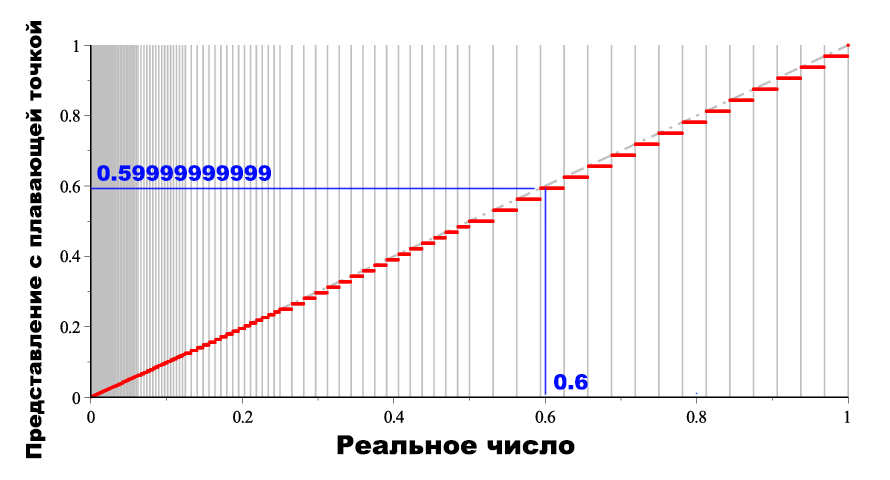

In [36]:
# 2**11
# 2**52

__sys.float_info__

**max** - максимальное представимое число;    
**max_exp** - максимальня степень 2 ;    
**max_10_exp** - максимальное число e, такое что 10\*\*e находится в [min , max];    
**min** - минимальное представимое число;    
**min_exp** - минимальная степень 2;    
**min_10_exp** - минимальное число e, такое что 10\*\*e находится в [min , max];    
**dig** - максимальное число цифр, которыми можно точно отобразить число;    
**mant_dig** - максимальное число цифр в radix системе счисления, которыми можно точно отобразить число;   
**epsilon** - разность между 1 и наименьшим числом большим 1 которую можно представить как число с плавающей точкой;  
**radix** - основание используемой системы счисления;    
**rounds** - целочисленная константа определяющая режим округления.  

In [25]:
import sys
print( 
    str( sys.float_info )
    .replace('(','(\n ') 
    .replace(')','\n)') 
    .replace(',',',\n') 
)

sys.float_info(
 max=1.7976931348623157e+308,
 max_exp=1024,
 max_10_exp=308,
 min=2.2250738585072014e-308,
 min_exp=-1021,
 min_10_exp=-307,
 dig=15,
 mant_dig=53,
 epsilon=2.220446049250313e-16,
 radix=2,
 rounds=1
)


---

переводить число из одной системы счисления в другую

число может быть переведено в десятичную систему по следующему алгоритму:

Каждая цифра числа   
должна быть умножена на основание системы счисления этого числа   
возведенное в степень равное позиции текущей цифры в числе   
справа налево,   

$1234.567 \\
= 1000 + 200 + 30 + 4 + 0.5 + 0.06 + 0.007 \\
= 1·10^3 + 2·10^2 + 3·10^1 + 4·100 + 5·10^{-1} + 6·10^{-2} + 7·10^{-3} $ 

$1001101.1101_2 \\
= 1·2^6 + 0·2^5 + 0·2^4 + 1·2^3 + 1·2^2 + 0·2^1 + 1·2^0 + 1·2^{-1} + 1·2^{-2} + 0·2^{-3} + 1·2^{-4} \\
=    64 +     0 + 0     +     8 +     4 +     0 +     1 +      0.5 +     0.25 +       0  + 0.0625 \\
= 77.8125_{10}$

0.1 — десятичное число (с основанием 10), 

$число = \pm мантисса \cdot основание^{экcпонента}$
